In [1]:
import tensorflow as tf

import numpy as np
import skimage
from PIL import Image

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,LSTM,TimeDistributed,UpSampling2D
from keras.optimizers import SGD
from keras.layers import Conv2D,MaxPooling2D,Flatten,Input,Reshape,AveragePooling2D,Conv2DTranspose
from keras.models import Model, Sequential
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.misc import imread, imresize
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [3]:
from skimage import io, filters,measure
from scipy import ndimage
import matplotlib.pyplot as plt

In [1]:
from skimage import io, filters,measure
from scipy import ndimage
import matplotlib.pyplot as plt
from PIL import Image

path="/home/p287103/SR/bees/"
# im = io.imread('imbee/beeType1_009.jpg', as_gray=True)
im = io.imread(path+'gt-dots/dots009.png', as_gray=True)
# plt.imshow(im)
val = filters.threshold_sauvola(im)
drops = ndimage.binary_fill_holes(im < val)
d=ndimage.morphology.binary_dilation(im,iterations=10)
# io.imsave('gt/1.png',d
im=io.imread('gt/dots011.png')
plt.imshow(im)
# dd=ndimage.morphology.binary_dilation(d)
# plt.imshow(d,cmap='gray')
# plt.imshow(drops, cmap='gray')
# plt.show()
# labels = measure.label(d)
# print(labels.max())
# print((np.asarray(drops/255.)))
# print((d/255.).sum())
# print(drops)

# im=Image.open('gt/1.png')
# im=im.convert('1')
# im.save('gt/2.png')
# print(im)
histo=ndimage.measurements.histogram(im,0,1,256)
print(histo)
# im=io.imread('gt/1.png')
# # print(d)
# dd=np.where(im>0.1,im,1)
# print(dd)
# plt.imshow(dd ,cmap='gray')
# # plt.imshow(im)
# labels = measure.label(im)
# print(labels.max())
# print(im)
# print((im).sum())

[300285      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      

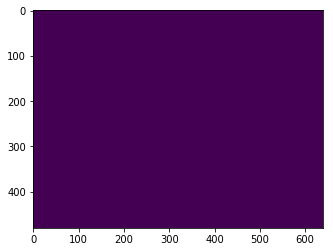

In [10]:
path='/home/p287103/SR/bees'
name = (os.listdir(path+'/gt-dots'))
# print(name)


for text in name:
    fullpath=path+"/gt-dots/"+text
    im = io.imread(fullpath)
#     val = filters.threshold_sauvola(im)
    # d=ndimage.morphology.binary_dilation(val)
    drops = ndimage.binary_opening(im)
    io.imsave(path+"/gt1/"+text, drops)
    # plt.imshow(val)
#     plt.imshow(drops, cmap='gray')
#     plt.show()
#     labels = measure.label(drops)
#     print(labels.max())
im=io.imread(path+"/gt1/"+text)
plt.imshow(im)

In [5]:
x,y=240,320
inChannel=3
input_img = Input(shape = (x, y, inChannel))
batch_size=5
epochs=100

W0729 13:53:20.273051 139821828888320 deprecation_wrapper.py:119] From /home/p287103/anaconda3/envs/tf/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 13:53:20.306052 139821828888320 deprecation_wrapper.py:119] From /home/p287103/anaconda3/envs/tf/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [6]:
# paths="/home/p287103/SR/bees"
# name = (os.listdir(paths))

# print(name)
# print(paths)
valid_exts=[".pgm"]
labels = []
imgcnt=0
vec=[]
imvec=[]
labelvec=[]
mylist=[]
numbervec=[]
maxwordlen=12

path="/home/p287103/SR/bees/imbee"
name = sorted(os.listdir(path))
for text in name:
#     print(text)
    fullpath=path+"/"+text
#     print(fullpath)
    currimg=imread(fullpath)
#     if currimg.ndim==3:
#         currimg=currimg[:,:,1]
        
    graysmall=imresize(currimg,[x,y])
    imvec.append(graysmall)
    imgcnt=imgcnt+1

path="/home/p287103/SR/bees/gt"
name = sorted(os.listdir(path))
# print(name)

for text in name:
#     print(text)
    fullpath=path+"/"+text
    currimg=imread(fullpath)
#     if currimg.ndim==3:
#         currimg=currimg[:,:,1]
#     val = filters.threshold_sauvola(im)
#     drops = np.asarray(ndimage.binary_fill_holes(im < val))
    graysmall=imresize(currimg,[x,y])
    graysmall=ndimage.binary_opening(graysmall)
    labelvec.append(graysmall)
    imgcnt=imgcnt+1
  
    
print("number of total image is ..%d" % (imgcnt))

/home/p287103/anaconda3/envs/tf/lib/python2.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/p287103/anaconda3/envs/tf/lib/python2.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
/home/p287103/anaconda3/envs/tf/lib/python2.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/p287103/anaconda3/envs/tf/lib/python2.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())

number of total image is ..236


In [7]:
datasize=118
batch_xs=np.asarray(imvec)
batch_ys=np.asarray(labelvec)
print(batch_ys.shape)
X_train=batch_xs.reshape(datasize,x, y, inChannel)
Y_train=batch_ys.reshape(datasize,x, y, 1)


(118, 240, 320)


In [32]:
from keras import backend as K
# K.teano_backend._get_available_gpus()

In [8]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12279833540316989728
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 17152487647948247926
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7906218373190830465
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7268886119
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8661022270429311483
physical_device_desc: "device: 0, name: GeForce GTX 1070 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [ ]:
from skimage import measure
labels = measure.label(drops)
print(labels.max())

In [15]:
model = Sequential()
# model.add((AveragePooling2D(pool_size=(1,1))))
model.add((Conv2D(16, kernel_size=(7,7),
                 activation='relu',
                 input_shape=(75,135,1))))
#                  input_shape=(43,78,1))))
model.add((MaxPooling2D(pool_size=(2, 2))))
model.add((Conv2D(32, (5,5), activation='relu')))
model.add((MaxPooling2D(pool_size=(2, 2))))
# model1 = Sequential()
model.add((Conv2DTranspose(
              filters=64,
              kernel_size=3,
              strides=(2, 2),
              padding="SAME",
              activation='relu')))

In [9]:
def autoencoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(16, (5,5), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(32, (5,5), activation='relu', padding='same')(pool1) #14 x 14 x 64
#     pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
#     conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
#     pool3 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
#     conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
#     pool4 = MaxPooling2D(pool_size=(2, 2))(conv4) #7 x 7 x 64

    #decoder
#     conv5 = Conv2D(256,(3,3), activation='relu', padding='same')(pool4) #7 x 7 x 128
#     up1 = UpSampling2D((2,2))(conv5) # 14 x 14 x 128
    conv6 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv2) #7 x 7 x 128
    up2= UpSampling2D((2,2))(conv6) # 14 x 14 x 128
#     conv7 = Conv2D(16 ,(5,5), activation='relu', padding='same')(up2) # 14 x 14 x 64
#     up3= UpSampling2D((2,2))(cozv7) # 28 x 28 x 64
    decoded = Conv2D(1, (5,5), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

In [10]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='binary_crossentropy', optimizer = 'adadelta')
# autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())
# autoencoder.compile(loss='binary_crossentropy', optimizer = RMSprop())

W0729 13:53:35.457967 139821828888320 deprecation_wrapper.py:119] From /home/p287103/anaconda3/envs/tf/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 13:53:35.487289 139821828888320 deprecation_wrapper.py:119] From /home/p287103/anaconda3/envs/tf/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0729 13:53:35.514487 139821828888320 deprecation_wrapper.py:119] From /home/p287103/anaconda3/envs/tf/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

W0729 13:53:35.526667 139821828888320 deprecation_wrapper.py:119] From /home/p287103/anaconda3/envs/tf/lib/python2.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Ple

In [11]:
autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 240, 320, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 320, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 120, 160, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 160, 32)      12832     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 120, 160, 16)      4624      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 240, 320, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 240, 320, 1)       401       
Total para

In [12]:
autoencoder_train = autoencoder.fit(X_train, Y_train, batch_size=5,epochs=500,verbose=1)


W0729 13:53:40.591530 139821828888320 deprecation_wrapper.py:119] From /home/p287103/anaconda3/envs/tf/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/500
118/118 [==============================] - 13s 113ms/step - loss: 0.6971
Epoch 2/500
118/118 [==============================] - 0s 3ms/step - loss: 0.3566
Epoch 3/500
118/118 [==============================] - 0s 3ms/step - loss: 0.3564
Epoch 4/500
118/118 [==============================] - 0s 3ms/step - loss: 0.3562
Epoch 5/500
118/118 [==============================] - 0s 3ms/step - loss: 0.3543
Epoch 6/500
118/118 [==============================] - 0s 4ms/step - loss: 0.3564
Epoch 7/500
118/118 [==============================] - 0s 4ms/step - loss: 0.8393
Epoch 8/500
118/118 [==============================] - 0s 4ms/step - loss: 0.3568
Epoch 9/500
118/118 [==============================] - 0s 4ms/step - loss: 0.3567
Epoch 10/500
118/118 [==============================] - 0s 4ms/step - loss: 0.3567
Epoch 11/500
118/118 [==============================] - 0s 4ms/step - loss: 0.3566
Epoch 12/500
118/118 [==============================] - 0s 4ms/step - loss: 0.3551
Epoch 13/5

118/118 [==============================] - 0s 4ms/step - loss: 0.0225
Epoch 197/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0226
Epoch 198/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0226
Epoch 199/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0236
Epoch 200/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0223
Epoch 201/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0232
Epoch 202/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0225
Epoch 203/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0267
Epoch 204/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0220
Epoch 205/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0220
Epoch 206/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0220
Epoch 207/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0227
Epoch 

118/118 [==============================] - 0s 4ms/step - loss: 0.0184
Epoch 391/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0184
Epoch 392/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0184
Epoch 393/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0190
Epoch 394/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0186
Epoch 395/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0184
Epoch 396/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0181
Epoch 397/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0186
Epoch 398/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0185
Epoch 399/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0187
Epoch 400/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0185
Epoch 401/500
118/118 [==============================] - 0s 4ms/step - loss: 0.0183
Epoch 

In [33]:
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.25,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")

autoencoder_train = autoencoder.fit_generator(aug.flow(X_train, Y_train, batch_size=10),
                                              steps_per_epoch=len(X_train) // 10 ,epochs=100,verbose=1)


Epoch 1/100
11/11 [==============================] - 1s 117ms/step - loss: 0.3458
Epoch 2/100
11/11 [==============================] - 1s 105ms/step - loss: 0.3109
Epoch 3/100
11/11 [==============================] - 1s 105ms/step - loss: 0.1335
Epoch 4/100
11/11 [==============================] - 1s 106ms/step - loss: 0.1156
Epoch 5/100
11/11 [==============================] - 1s 112ms/step - loss: 0.1112
Epoch 6/100
 7/11 [==================>...........] - ETA: 0s - loss: 0.1154

KeyboardInterrupt: 

In [1]:
ind=np.random.randint(118)
print(ind)
# ind=8
fig, axs = plt.subplots(1, 5, figsize=(15,4))

im=imvec[ind]
label=labelvec[ind]
# print(label)
# plt.subplots(2,4 ,4)
print(label.sum())
plt.subplot(1, 5,1)
plt.imshow(im)

val = filters.threshold_otsu(im)
im3=im[:,:,1]>val
plt.subplot(1, 5,2)

plt.imshow(im3)
l = measure.label(im3)
print(l.max())


plt.subplot(1, 5,3)
plt.imshow(label)
# X_test = np.reshape(im,(-1,150, 270, 1))
X_test = np.reshape(im,(-1,x, y, inChannel))
# X_test = np.reshape(im,(-1,43, 78, 1))
# X_test = np.reshape(im,(1,28, 140))

# preds = loaded_model.predict(X_test)
preds = autoencoder.predict(X_test)
print(preds.shape)
pred=np.reshape(preds,(x, y))
plt.subplot(1, 5,4)
plt.imshow(pred)
print(pred.sum())
io.imsave('1.jpg',pred)
val = filters.threshold_sauvola(label)
drops = ndimage.binary_opening(label)
l = measure.label(drops)
print(l.max())
# pred=preds[:,:,1]
# plt.imshow(p)
pred=io.imread('1.jpg')
plt.subplot(1, 5,5)

val = filters.threshold_otsu(pred)
# drops = ndimage.binary_fill_holes(pred<val )
im2=pred>val
plt.imshow(im2, cmap='gray')
drops = ndimage.binary_closing(pred )
l = measure.label(im2)
print(l.max())
histo=ndimage.measurements.histogram(pred,0,1,256)
# print(histo)

NameError: name 'np' is not defined

In [31]:
import pickle
pickle.dump(autoencoder, open('final_prediction.pickle', 'wb'))

In [4]:
# import flask
from flask import Flask
from flask import Flask, request, redirect, url_for, flash, jsonify
